In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-white.csv',delimiter=';')

In [4]:
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [5]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)

In [6]:
r2=make_scorer(r2_score)

In [7]:
grid_params={'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
clf=GridSearchCV(Lasso(),param_grid=grid_params,cv=10,return_train_score=False,scoring=r2)
clf.fit(X,y)

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8032808233715514, tolerance: 0.3447121370235942
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100]},
             scoring=make_scorer(r2_score))

In [8]:
clf.best_params_

{'alpha': 1e-08}

In [9]:
clf.best_score_

0.2497911648779228

In [10]:
lassoreg=Lasso(alpha=clf.best_params_['alpha'])
y_pred=cross_val_predict(lassoreg,X,y,cv=10)

In [11]:
r2_value=r2_score(y,y_pred)
adj_r2=1-((1-r2_value)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

In [12]:
r2_value

0.26575577475879675

In [13]:
adj_r2

0.2641027484637387

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

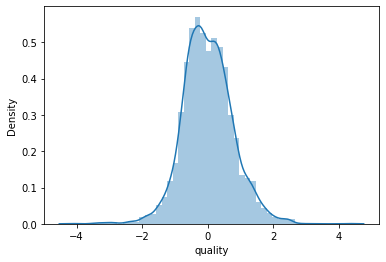

In [14]:
import seaborn as sns
sns.distplot(y-y_pred)